# Chap 2: End to End Machine learning project

This is the 2nd chapter from the Book "Hands on Machine Learning using ScikitLearn and TensorFlow"

## Project Summary

In this project we will use the California Housing data available at StatLib repository and use it to predict housing prices given other attributes

## Data

In this section we will download the data, load it into python and analyse the data at a high level to get a feel for what the data holds. This includes summarizing the details of the dataset and also ploting some of the things in order to visually understand the data

### Donwloading the data

In [52]:
# Function to download the data from the internet
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # Check and see if HOUSINGPATH dir needs to be created
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

### Loading the data into Pandas

In [53]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### Downloading and Reading the data into Python

In [54]:
# Download the data
fetch_housing_data()

# Read the data into python
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [55]:
# Get more details about the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [56]:
# Check value_counts() method
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [57]:
# Get the dataset summary
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


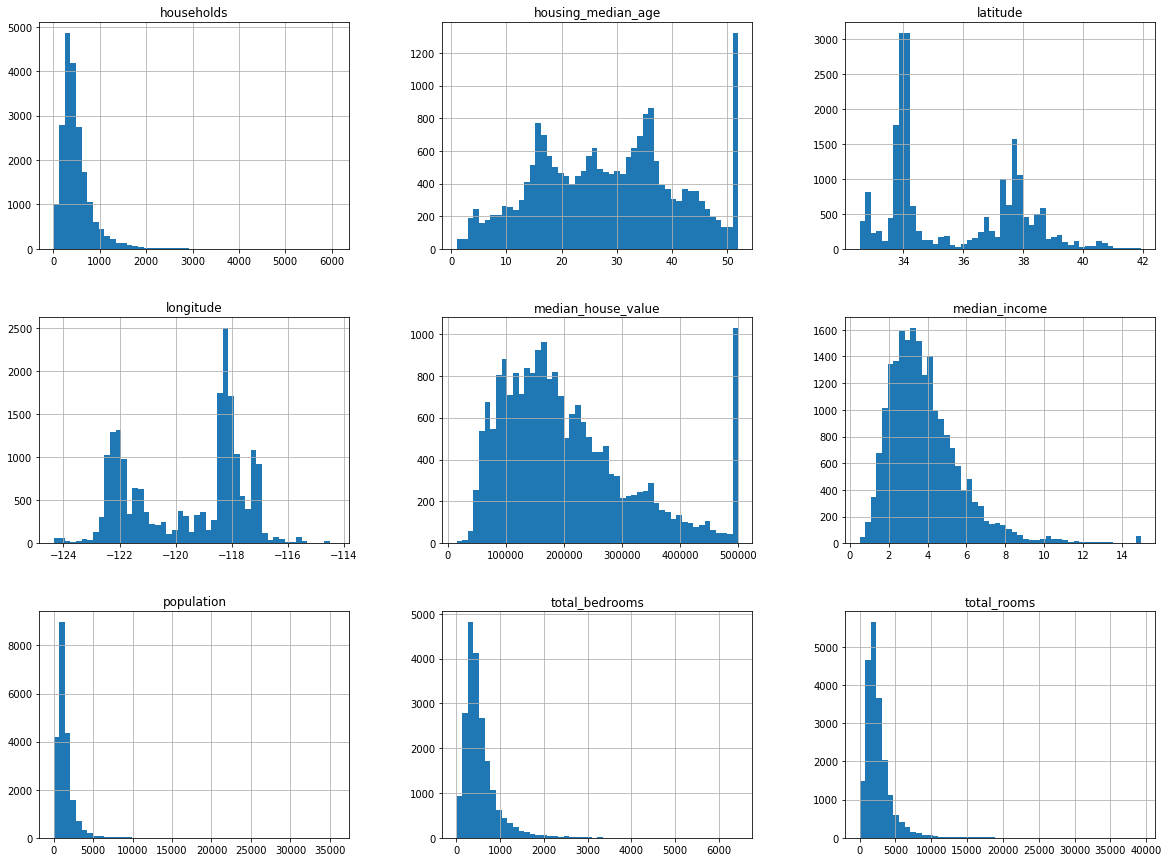

In [58]:
# Get the plot of the summary of each column in the dataset
import matplotlib.pyplot as plt
%matplotlib inline

housing.hist(bins = 50, figsize = [20, 15])
plt.show()

### Create a test dataset

We want to create a test data so that our analysis doesn't get biased as we look at the whole dataset

The **median_income** column is of prime importance as per the "clients" and we need to make sure that the split in test and train features equal contibution of the median income population. We will need to perform a stratified sampling in this case.

First, we will need to categorically divide median_income column. Then use scikit learn's **StratifiedShuffleSplit** function to get our train and test splits.

If we had to get a random sample, we could've used scikit learn's **train_test_split** function as shown below

#### Randomg Split

In [59]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

# Get a random test train split using scikit learn function
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)


# Get value counts
# Check if split worked
value_counts_entire_data = housing["income_cat"].value_counts()/len(housing)
value_counts_test_data = test_set["income_cat"].value_counts()/len(test_set)
value_counts_train_data = train_set["income_cat"].value_counts()/len(train_set)

# Put them in a dataframe to check side by side
sampling_perf = pd.DataFrame({"Entire Data": value_counts_entire_data, 
             "Test Data" : value_counts_test_data,
             "Train Data" : value_counts_train_data,}).sort_index()

# Calculate error 
sampling_perf["% test error"] = (sampling_perf["Test Data"] - sampling_perf["Entire Data"])/sampling_perf["Entire Data"] * 100
sampling_perf["% train error"] = (sampling_perf["Train Data"] - sampling_perf["Entire Data"])/sampling_perf["Entire Data"] * 100
    

sampling_perf

,Entire Data,Test Data,Train Data,% test error,% train error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.317466,1.732260,-0.433065
3.0,0.350581,0.358527,0.348595,2.266446,-0.566611
4.0,0.176308,0.167393,0.178537,-5.056334,1.264084
5.0,0.114438,0.109496,0.115673,-4.318374,1.079594


#### Stratified Sampling

Here we will split test and train based on **median_income**

In [60]:
# Create the income_cat column. Category should only be till 5


housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

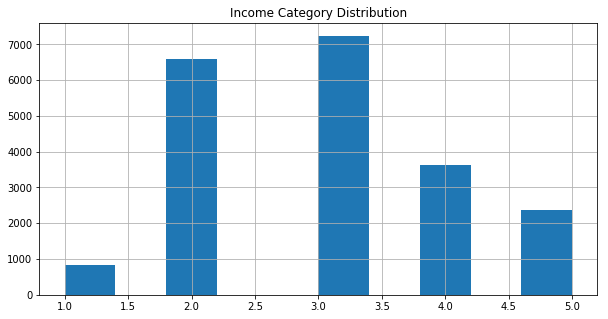

In [61]:
# Plot the housing category
housing["income_cat"].hist(figsize = [10, 5])
plt.title("Income Category Distribution")
plt.show()

In [62]:
# Divide Test and Train data based on income_cat column
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.iloc[train_index, :]
    test_set = housing.iloc[test_index, :]

In [63]:
# Check if split worked
value_counts_entire_data = housing["income_cat"].value_counts()/len(housing)
value_counts_test_data = test_set["income_cat"].value_counts()/len(test_set)
value_counts_train_data = train_set["income_cat"].value_counts()/len(train_set)

# Put them in a dataframe to check side by side
sampling_perf = pd.DataFrame({"Entire Data": value_counts_entire_data, 
             "Test Data" : value_counts_test_data,
             "Train Data" : value_counts_train_data,}).sort_index()

# Calculate error 
sampling_perf["% test error"] = (sampling_perf["Test Data"] - sampling_perf["Entire Data"])/sampling_perf["Entire Data"] * 100
sampling_perf["% train error"] = (sampling_perf["Train Data"] - sampling_perf["Entire Data"])/sampling_perf["Entire Data"] * 100
     

sampling_perf

,Entire Data,Test Data,Train Data,% test error,% train error
1.0,0.039826,0.039729,0.039850,-0.243309,0.060827
2.0,0.318847,0.318798,0.318859,-0.015195,0.003799
3.0,0.350581,0.350533,0.350594,-0.013820,0.003455
4.0,0.176308,0.176357,0.176296,0.027480,-0.006870
5.0,0.114438,0.114583,0.114402,0.127011,-0.031753


As we can see from the comparison that the Stratified sampling does a way better job at representing population of different income groups in the test and train data. We will now remove the **income_cat** variable from the data to bring it back to its original format

In [64]:
# Drop the income_cat column from test and train sets
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

/Users/soutikchakraborty/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Visualization and Insights

In this section we will visualize the data and try to gain insights from the data before building out a machine learning model

In [84]:
# Copy the train_set to housing so that the train_set is not modified by mistake
housing = train_set.copy()

housing.columns

Index([u'longitude', u'latitude', u'housing_median_age', u'total_rooms',
       u'total_bedrooms', u'population', u'households', u'median_income',
       u'median_house_value', u'ocean_proximity'],
      dtype='object')

### Plot using latitude and longitude

Here we will try to find patterns in the data by plotting a scatterplot of housing prices by latitude and longitude. This will allow us to look at the difference in prices by region

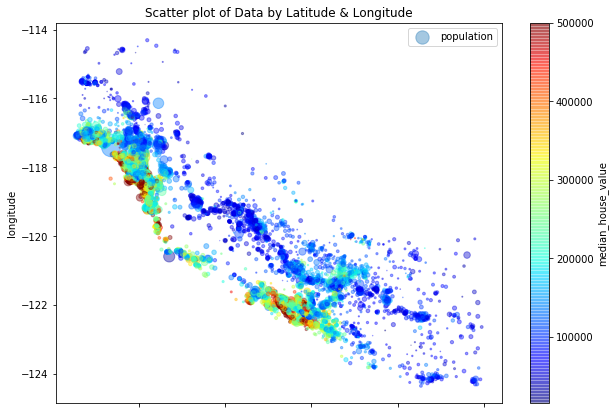

In [77]:
housing.plot(kind = "scatter", 
             x = "latitude", 
             y = "longitude", 
             alpha = 0.4,
             s = housing["population"]/100, label = "population",
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar=True,
             figsize=[10, 7])
plt.legend()
plt.title("Scatter plot of Data by Latitude & Longitude")
plt.show()

In [86]:
# Impute the NA values
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = "median")

In [92]:
# Separate the label and variable columns
housing_labels = train_set["median_house_value"].copy()
housing = train_set.drop("median_house_value", axis=1)

# Consider only numeric columns
housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [101]:
print imputer.statistics_

[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]


In [102]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

## ML Pipeline

In this section we will try to build a pipeline for the entire ML process and see how it can be used better for iteration over the data and feature generation

The below function allows us to add attributes/variables to our data in a pipeline. Since Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: 
- fit() (returning self), 
- transform(), and 
- fit_transform(). 

You can get the last one for free by simply adding TransformerMixin as a base class. Also, if you add BaseEstimator as a base class (and avoid ***args** and ****kargs** in your constructor) you will get two extra methods (get_params() and set_params())

In [103]:
# Categorical encoder -- NOT TO BE UNDERSTOOD AT THIS STAGE
# Copied from --> https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb

# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Transformation Pipeline

We will try to build a pipeline using sklearn's Pipeline function. We will first Imputer our data using the imputer function described above, then add attributes to our data and then standardize the data so all columns have 0 mean and they don't have scales that might throw our models off track. 

The pipeline will have the following attributes then --
- Get numeric columns from a dataframe 
- Impute the values
- Add attributes/new variables to the data
- Standardize the attributes

In [105]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

# Pipeline for Numerical attributes
num_pipeline = Pipeline([
        ('Selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

# Pipeline for Categorical attributes
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])


In [107]:
from sklearn.pipeline import FeatureUnion

# Full Pipeline
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [108]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [109]:
housing_prepared.shape

(16512, 16)

## Train ML Model

In the following sections we will train our Machine Learning models on the train dataset and try to tune it to best fit our data

### Linear Regression Model

In [111]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

/Users/soutikchakraborty/venv/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489219

The above model is a case of underfit. We will try the decision tree models and check how they work

### Decision Tree

In [113]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [115]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The above case is a clear result of the tree overfitting on the train data. We will now move to cross-validation technique in order to prevent overfitting of data

### Cross Validation

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [118]:
# Decision Tree Cross Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

('Scores:', array([ 69178.3567624 ,  67074.11966877,  70941.12694924,  69551.63698945,
        70192.98706333,  75614.7688068 ,  69076.8707806 ,  71100.32863382,
        75763.23778427,  72004.36883104]))
('Mean:', 71049.780226972944)
('Standard deviation:', 2648.7809457255335)


In [119]:
# Linear Regression Cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

('Scores:', array([ 66782.73843989,  66960.118071  ,  70361.18285107,  74742.02420674,
        68022.09224176,  71193.07033936,  64969.63056405,  68276.69992785,
        71543.69797334,  67665.10082067]))
('Mean:', 69051.635543573619)
('Standard deviation:', 2732.3913087537303)


### Random Forest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [123]:
scores = cross_val_score(rf_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)

display_scores(rf_rmse_scores)

('Scores:', array([ 51819.30303642,  51661.80382271,  52860.65230259,  54392.35405796,
        51795.18174478,  56127.70946965,  51573.732868  ,  50555.81363104,
        54874.07647007,  51607.16818474]))
('Mean:', 52726.779558796225)
('Standard deviation:', 1705.6074991401922)


This score is much better than what we achieved with Linear Regression and simple decision tress. But as we can see that the validation rmse are higher than training rmse. This shows that the model is still overfitting on the data.

### Grid Search

Here we will try to search for the best parameters to fine tune our model so that it doesn't overfit on the train data

In [124]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [125]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [126]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [127]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

(64858.153149908903, {'max_features': 2, 'n_estimators': 3})
(55613.774967444297, {'max_features': 2, 'n_estimators': 10})
(52733.92197302034, {'max_features': 2, 'n_estimators': 30})
(60285.46491783228, {'max_features': 4, 'n_estimators': 3})
(52958.35757218807, {'max_features': 4, 'n_estimators': 10})
(50416.180178637929, {'max_features': 4, 'n_estimators': 30})
(59064.574182743308, {'max_features': 6, 'n_estimators': 3})
(51857.457462505925, {'max_features': 6, 'n_estimators': 10})
(50189.141121007313, {'max_features': 6, 'n_estimators': 30})
(58926.790633456585, {'max_features': 8, 'n_estimators': 3})
(52519.900367921895, {'max_features': 8, 'n_estimators': 10})
(49944.770412656078, {'max_features': 8, 'n_estimators': 30})
(62719.897677091212, {'max_features': 2, 'n_estimators': 3, 'bootstrap': False})
(54926.86913765574, {'max_features': 2, 'n_estimators': 10, 'bootstrap': False})
(60790.52365607697, {'max_features': 3, 'n_estimators': 3, 'bootstrap': False})
(52609.508512880609, 

In [132]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [135]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse = True)

[(0.38275831732992427, 'median_income'),
 (0.14796410608663882, 'INLAND'),
 (0.11444228994479548, 'pop_per_hhold'),
 (0.070841794098764066, 'longitude'),
 (0.062813617413494047, 'bedrooms_per_room'),
 (0.059053567842574095, 'latitude'),
 (0.046922480067472461, 'rooms_per_hhold'),
 (0.042414841493007741, 'housing_median_age'),
 (0.015960192419666626, 'total_rooms'),
 (0.015403055506713451, 'population'),
 (0.013907461853318984, 'households'),
 (0.013875609921437019, 'total_bedrooms'),
 (0.0075408604685836163, '<1H OCEAN'),
 (0.0041240933686519966, 'NEAR OCEAN'),
 (0.0019251276376959369, 'NEAR BAY'),
 (5.2584547261337745e-05, 'ISLAND')]

## Test Set Evaluation

Here we will evaluate the performance of our model on the test set

In [137]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   # => evaluates to 47,766.0

In [138]:
final_rmse

47742.636749543737